In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [6]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

In [12]:
x_train = df.drop(['target'], 1)

In [18]:
rf.fit(x_train, df.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

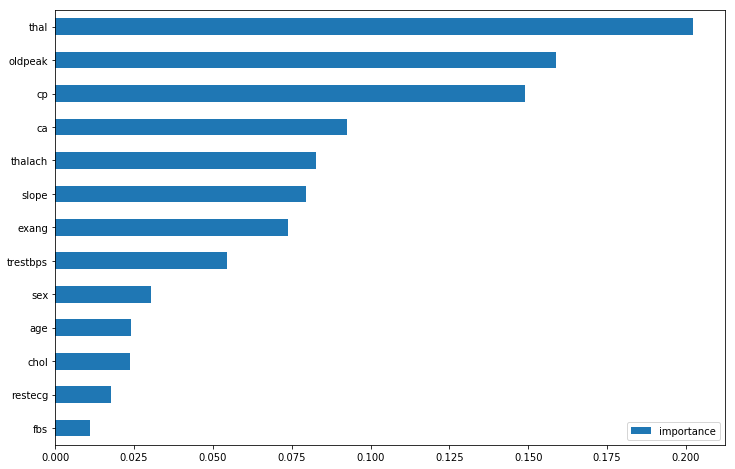

In [19]:
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [21]:
mush = pd.read_csv('training_mush.csv')
mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [31]:
x_train = mush.drop(['class'], 1)
y_train = mush['class']

In [32]:
rf = RandomForestClassifier(random_state=0)


In [36]:
parametrs = {'n_estimators': range(10, 50, 10),
             'min_samples_split': range(2, 9, 2), 
             'max_depth': range(1, 12, 2),
             'min_samples_leaf': range(1, 7)} 
search = GridSearchCV(rf, parametrs, verbose=1, n_jobs=-1, cv=3)
search.fit(x_train, y_train)
best_tree = search.best_estimator_

#predictions = best_tree.predict(test)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:   18.7s finished


In [39]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

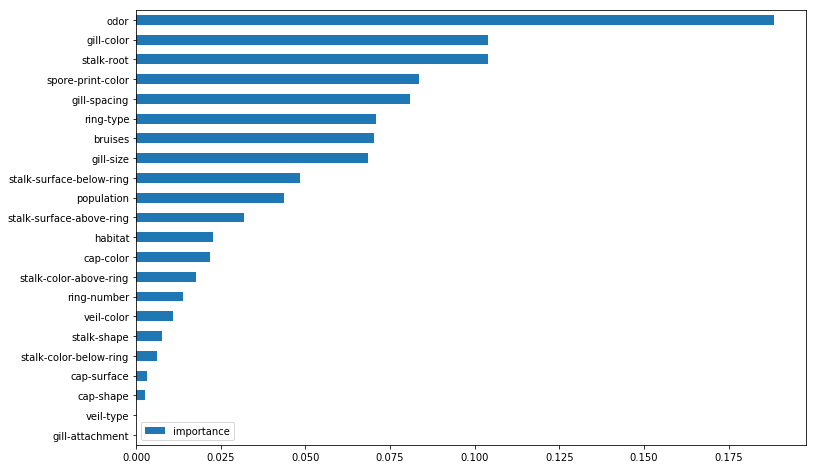

In [41]:
imp = pd.DataFrame(best_tree.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [42]:
test = pd.read_csv('testing_mush.csv')
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [43]:
best_tree.predict(test).sum()

976

In [44]:
y_pred = best_tree.predict(test)
y_true = pd.read_csv('testing_y_mush.csv')

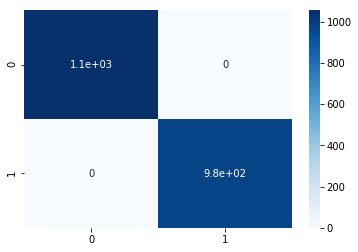

In [49]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")

In [103]:
df = pd.read_csv('invasion.csv')
df.head(6)

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
5,cruiser,11.839620,11.175053,14.148615,0.727049,366230,344.868989


In [104]:
#df = pd.get_dummies(df)
df.head(6)

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
5,cruiser,11.839620,11.175053,14.148615,0.727049,366230,344.868989


In [96]:
x = df.drop(['class'], 1)
y = pd.factorize(df['class'])[0]

In [97]:
y

array([0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 2, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0,
       0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0,
       1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2,

In [105]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x, y)

/home/dmi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [99]:
parametrs = {'n_estimators': range(10, 50, 3),
             'min_samples_split': range(2, 10), 
             'max_depth': range(1, 12),
             'min_samples_leaf': range(1, 10)} 
search = GridSearchCV(rf, parametrs, verbose=1, n_jobs=-1, cv=3)
search.fit(x, y)
best_tree = search.best_estimator_

#predictions = best_tree.predict(test)

Fitting 3 folds for each of 11088 candidates, totalling 33264 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1478 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 2378 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 3478 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 4778 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 6278 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 7978 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 9878 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 11978 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 14278 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 16778 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 19478 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 22378 tasks 

In [85]:
best_tree

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [101]:
test = pd.read_csv('operative_information.csv')
test.head(), test.shape

(   g_reflection  i_reflection       speed  brightness  time_of_observance  \
 0      7.516543      3.916691  513.954279    0.177247              105908   
 1      4.322988      6.967689   63.752970    0.545922              277855   
 2      4.595724      9.098297   62.233948    0.389201              160662   
 3      2.689675      7.964869   62.475495    0.541081              162092   
 4      8.075576      5.169719  336.441261    0.174757              466853   
 
       volume  
 0  13.267224  
 1  39.833130  
 2  42.014556  
 3  42.056829  
 4  11.779813  , (1500, 6))

In [106]:
pd.Series(rf.predict(test)).value_counts()

1    675
0    595
2    230
dtype: int64

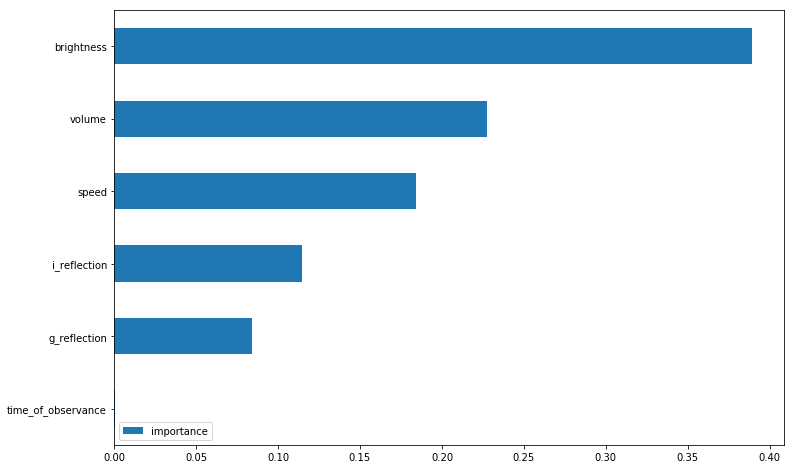

In [108]:
imp = pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [109]:
imp.sort_values('importance')

,importance
time_of_observance,0.000646
g_reflection,0.084106
i_reflection,0.114564
speed,0.184017
volume,0.227657
brightness,0.389010


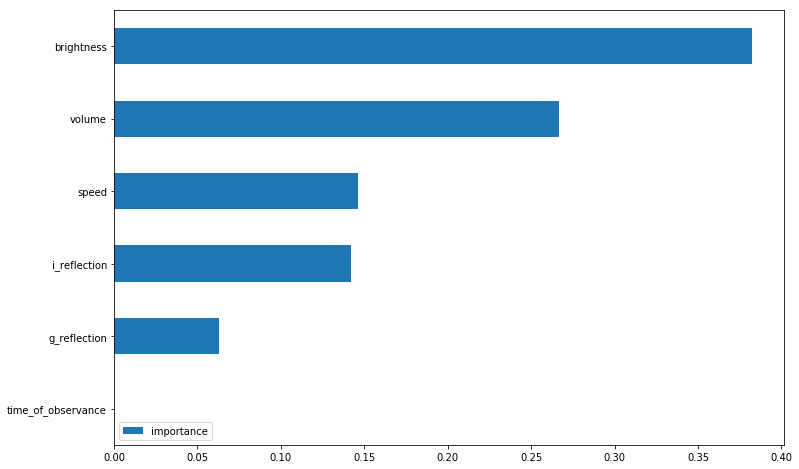

In [110]:
imp = pd.DataFrame(best_tree.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))